<a href="https://colab.research.google.com/github/Data-Flop/Flopezg/blob/master/HumanActRecAcc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Human Activity Recognition Using Accelerometer Data

https://github.com/laxmimerit/Human-Activity-Recognition-Using-Accelerometer-Data-and-CNN

- Matrix confussion 
https://www.kaggle.com/grfiv4/plot-a-confusion-matrix

In [104]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

2.4.1


In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

LOAD DATA SET

In [106]:
from google.colab import files
import io
import re

uploaded = files.upload()

In [107]:
columns = ['user', 'activity', 'time', 'x', 'y', 'z']
data = pd.read_csv('WISDM_ar_v1.1_raw.txt', sep=",", header=None, names=columns)
data['z'] = data['z'].str.replace(r';', '')
  
data.head()

,user,activity,time,x,y,z
0,33,Jogging,49105962326000,-0.694638,12.680544,0.50395286
1,33,Jogging,49106062271000,5.012288,11.264028,0.95342433
2,33,Jogging,49106112167000,4.903325,10.882658,-0.08172209
3,33,Jogging,49106222305000,-0.612916,18.496431,3.0237172
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164


In [108]:
data.shape

(1098204, 6)

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1098204 entries, 0 to 1098203
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   user      1098204 non-null  int64  
 1   activity  1098204 non-null  object 
 2   time      1098204 non-null  int64  
 3   x         1098204 non-null  float64
 4   y         1098204 non-null  float64
 5   z         1098203 non-null  object 
dtypes: float64(2), int64(2), object(2)
memory usage: 50.3+ MB


In [110]:
data.isnull().sum()

user        0
activity    0
time        0
x           0
y           0
z           1
dtype: int64

In [111]:
data['activity'].value_counts()

Walking       424398
Jogging       342176
Upstairs      122869
Downstairs    100427
Sitting        59939
Standing       48395
Name: activity, dtype: int64

In [112]:
data['x'] = data['x'].astype('float')
data['y'] = data['y'].astype('float')
data['z'] = data['z'].astype('float')

In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1098204 entries, 0 to 1098203
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   user      1098204 non-null  int64  
 1   activity  1098204 non-null  object 
 2   time      1098204 non-null  int64  
 3   x         1098204 non-null  float64
 4   y         1098204 non-null  float64
 5   z         1098203 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 50.3+ MB


In [114]:
Fs = 20
activities = data['activity'].value_counts().index

In [115]:
activities

Index(['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing'], dtype='object')

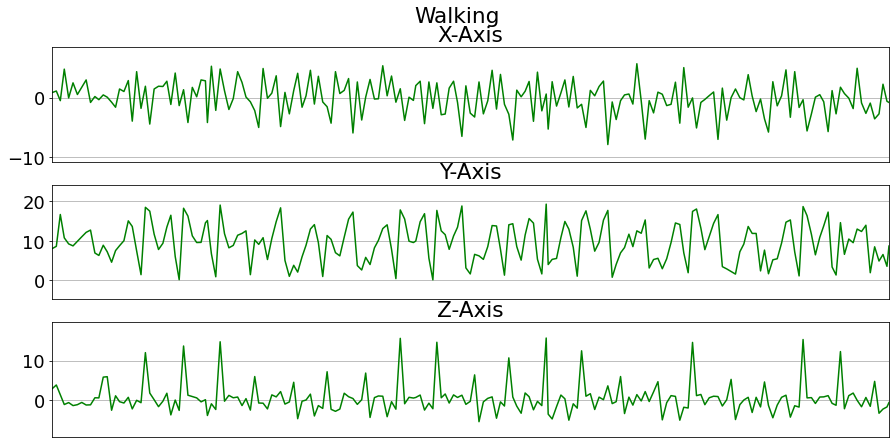

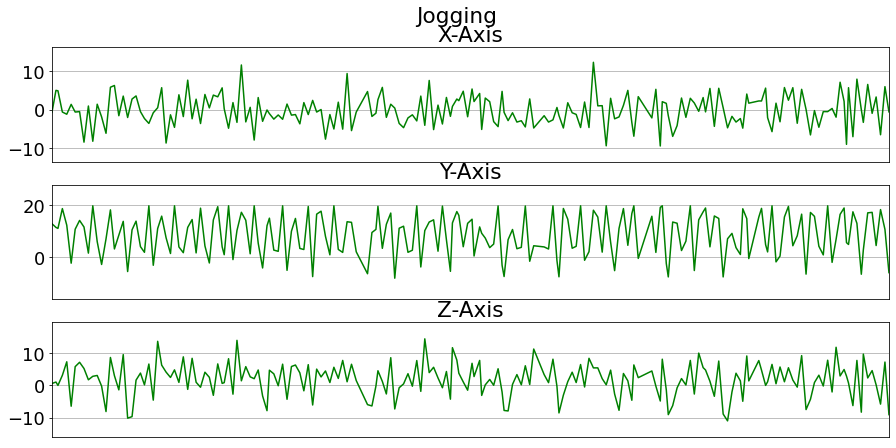

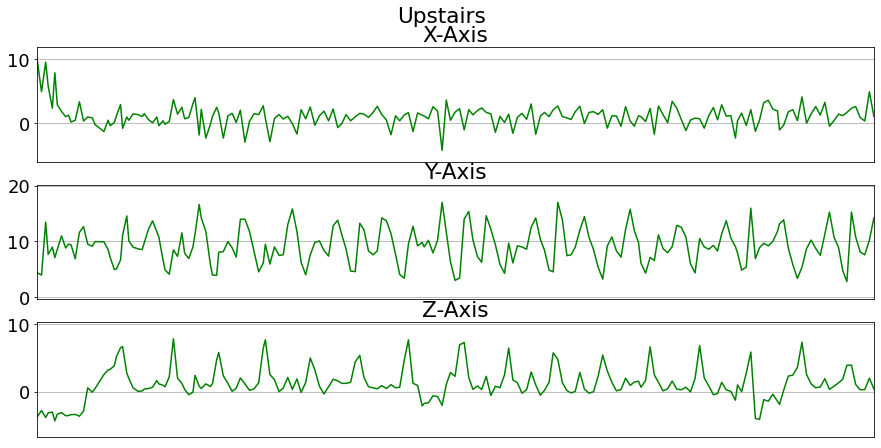

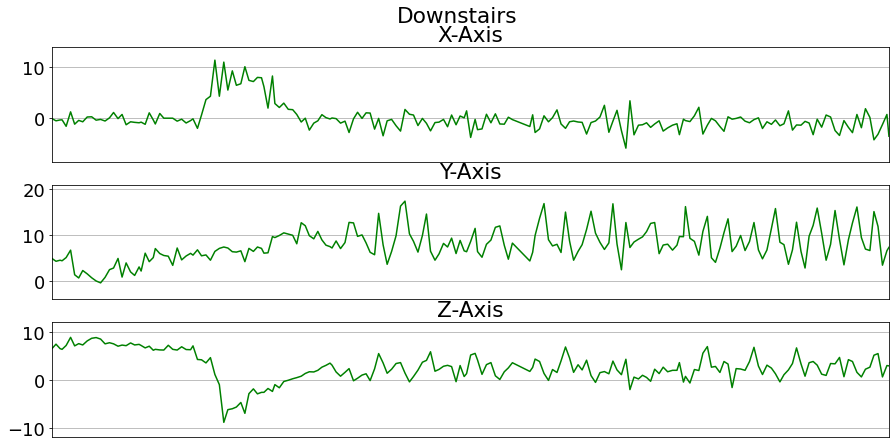

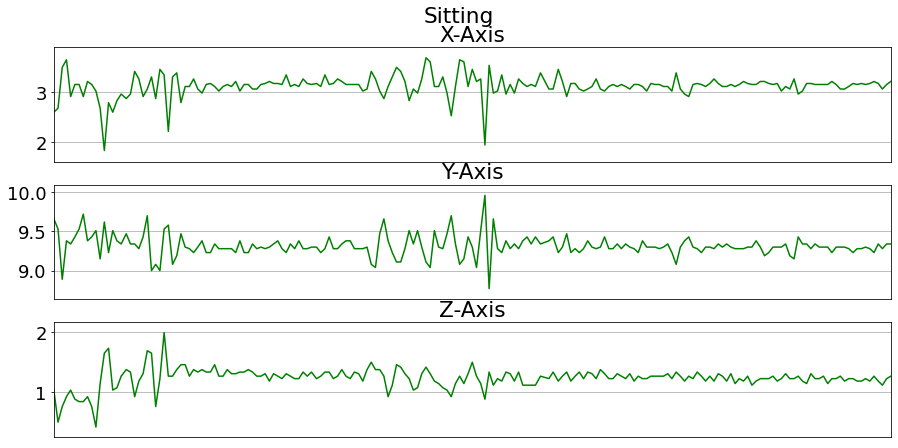

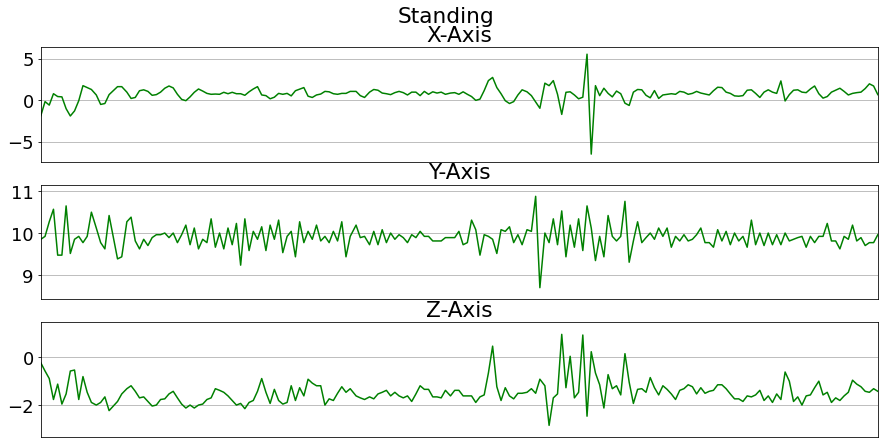

In [117]:
def plot_activity(activity, data):
    fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(15, 7), sharex=True)
    plot_axis(ax0, data['time'], data['x'], 'X-Axis')
    plot_axis(ax1, data['time'], data['y'], 'Y-Axis')
    plot_axis(ax2, data['time'], data['z'], 'Z-Axis')
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(activity)
    plt.subplots_adjust(top=0.90)
    plt.show()

def plot_axis(ax, x, y, title):
    ax.plot(x, y, 'g')
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)

for activity in activities:
    data_for_plot = data[(data['activity'] == activity)][:Fs*10]
    plot_activity(activity, data_for_plot)

In [118]:
df = data.drop(['user', 'time'], axis = 1).copy()
df.head()

,activity,x,y,z
0,Jogging,-0.694638,12.680544,0.503953
1,Jogging,5.012288,11.264028,0.953424
2,Jogging,4.903325,10.882658,-0.081722
3,Jogging,-0.612916,18.496431,3.023717
4,Jogging,-1.184970,12.108489,7.205164


In [119]:
df['activity'].value_counts()

Walking       424398
Jogging       342176
Upstairs      122869
Downstairs    100427
Sitting        59939
Standing       48395
Name: activity, dtype: int64

In [120]:
Walking = df[df['activity']=='Walking'].head(3555).copy()
Jogging = df[df['activity']=='Jogging'].head(3555).copy()
Upstairs = df[df['activity']=='Upstairs'].head(3555).copy()
Downstairs = df[df['activity']=='Downstairs'].head(3555).copy()
Sitting = df[df['activity']=='Sitting'].head(3555).copy()
Standing = df[df['activity']=='Standing'].head(3555).copy()

In [121]:
balanced_data = pd.DataFrame()
balanced_data = balanced_data.append([Walking, Jogging, Upstairs, Downstairs, Sitting, Standing])
balanced_data.shape

(21330, 4)

In [122]:
balanced_data['activity'].value_counts()

Walking       3555
Standing      3555
Upstairs      3555
Jogging       3555
Downstairs    3555
Sitting       3555
Name: activity, dtype: int64

In [123]:
balanced_data.head()

,activity,x,y,z
597,Walking,0.844462,8.008764,2.792171
598,Walking,1.116869,8.621680,3.786457
599,Walking,-0.503953,16.657684,1.307553
600,Walking,4.794363,10.760075,-1.184970
601,Walking,-0.040861,9.234595,-0.694638


In [124]:
from sklearn.preprocessing import LabelEncoder

In [125]:
label = LabelEncoder()
balanced_data['label'] = label.fit_transform(balanced_data['activity'])
balanced_data.head()

,activity,x,y,z,label
597,Walking,0.844462,8.008764,2.792171,5
598,Walking,1.116869,8.621680,3.786457,5
599,Walking,-0.503953,16.657684,1.307553,5
600,Walking,4.794363,10.760075,-1.184970,5
601,Walking,-0.040861,9.234595,-0.694638,5


In [126]:
label.classes_

array(['Downstairs', 'Jogging', 'Sitting', 'Standing', 'Upstairs',
       'Walking'], dtype=object)

Standardized data

In [127]:
X = balanced_data[['x', 'y', 'z']]
y = balanced_data['label']

In [128]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

scaled_X = pd.DataFrame(data = X, columns = ['x', 'y', 'z'])
scaled_X['label'] = y.values

scaled_X

,x,y,z,label
0,0.000503,-0.099190,0.337933,5
1,0.073590,0.020386,0.633446,5
2,-0.361275,1.588160,-0.103312,5
3,1.060258,0.437573,-0.844119,5
4,-0.237028,0.139962,-0.698386,5
...,...,...,...,...
21325,-0.470217,0.178084,0.261019,3
21326,-0.542658,0.193692,0.248875,3
21327,-0.628514,0.197593,0.261019,3
21328,-0.781444,0.049322,0.155768,3


In [129]:
import scipy.stats as stats

In [130]:
Fs = 20
frame_size = Fs*4 # 80
hop_size = Fs*2 # 40

In [131]:
def get_frames(df, frame_size, hop_size):

    N_FEATURES = 3

    frames = []
    labels = []
    for i in range(0, len(df) - frame_size, hop_size):
        x = df['x'].values[i: i + frame_size]
        y = df['y'].values[i: i + frame_size]
        z = df['z'].values[i: i + frame_size]
        
        # Retrieve the most often used label in this segment
        label = stats.mode(df['label'][i: i + frame_size])[0][0]
        frames.append([x, y, z])
        labels.append(label)

    # Bring the segments into a better shape
    frames = np.asarray(frames).reshape(-1, frame_size, N_FEATURES)
    labels = np.asarray(labels)

    return frames, labels

In [132]:
X, y = get_frames(scaled_X, frame_size, hop_size)

In [133]:
X.shape, y.shape

((532, 80, 3), (532,))

In [93]:
(3555*6)/40

533.25

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [135]:
X_train.shape, X_test.shape

((425, 80, 3), (107, 80, 3))

In [136]:
X_train[0].shape, X_test[0].shape

((80, 3), (80, 3))

In [137]:
X_train = X_train.reshape(425, 80, 3, 1)
X_test = X_test.reshape(107, 80, 3, 1)

In [138]:
X_train[0].shape, X_test[0].shape

((80, 3, 1), (80, 3, 1))

2D CNN Model

In [139]:
model = Sequential()
model.add(Conv2D(16, (2, 2), activation = 'relu', input_shape = X_train[0].shape))
model.add(Dropout(0.1))

model.add(Conv2D(32, (2, 2), activation='relu'))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(6, activation='softmax'))

In [140]:
model.compile(optimizer=Adam(learning_rate = 0.001),
              loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [141]:
history = model.fit(X_train, y_train, epochs = 100,
                    validation_data= (X_test, y_test), verbose=1)

Epoch 1/100
14/14 [==============================] - 1s 14ms/step - loss: 1.6538 - accuracy: 0.2479 - val_loss: 1.2929 - val_accuracy: 0.4393
Epoch 2/100
14/14 [==============================] - 0s 5ms/step - loss: 1.2262 - accuracy: 0.5632 - val_loss: 0.9377 - val_accuracy: 0.7944
Epoch 3/100
14/14 [==============================] - 0s 5ms/step - loss: 1.0129 - accuracy: 0.6408 - val_loss: 0.6188 - val_accuracy: 0.8224
Epoch 4/100
14/14 [==============================] - 0s 5ms/step - loss: 0.6631 - accuracy: 0.8118 - val_loss: 0.4419 - val_accuracy: 0.8785
Epoch 5/100
14/14 [==============================] - 0s 5ms/step - loss: 0.5283 - accuracy: 0.8187 - val_loss: 0.3816 - val_accuracy: 0.8505
Epoch 6/100
14/14 [==============================] - 0s 5ms/step - loss: 0.4380 - accuracy: 0.8432 - val_loss: 0.3282 - val_accuracy: 0.8879
Epoch 7/100
14/14 [==============================] - 0s 5ms/step - loss: 0.3724 - accuracy: 0.8847 - val_loss: 0.2607 - val_accuracy: 0.9252
Epoch 8/100


In [142]:
def plot_learningCurve(history, epochs):
  # Plot training & validation accuracy values
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

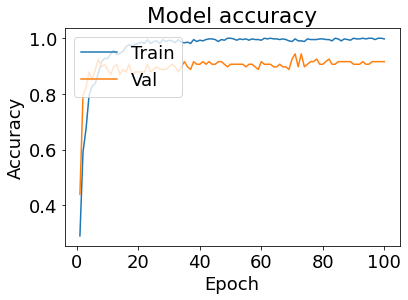

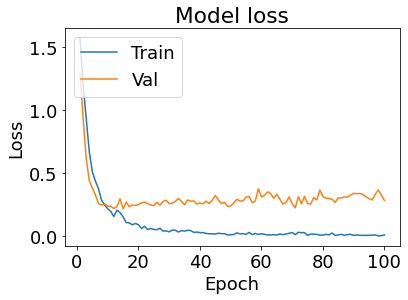

In [143]:
plot_learningCurve(history, 100)

Confusion Matrix
Detailed video is available here: https://youtu.be/SToqP9V9y7Q

pip install mlxtend -> http://rasbt.github.io/mlxtend/installation/

In [144]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib
!pip install scikit-plot

In [145]:
font = {
    'family' : 'Times New Roman',
    'size' : 18
}

class_names = ['Standing',  'Sitting', 'Downstairs', 'Walking', 'Upstairs', 'Jogging']  

matplotlib.rc('font', **font)

y_pred = model.predict_classes(X_test)

mat = confusion_matrix(y_test, y_pred)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [146]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(16, 16))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = np.round((cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]),2)
  

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(round(cm[i, j],2)),
                     horizontalalignment="center", 
                     color="white" if round(cm[i, j],2) > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(round(cm[i, j],2)),
                     horizontalalignment="center",
                     color="white" if round(cm[i, j],2) > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

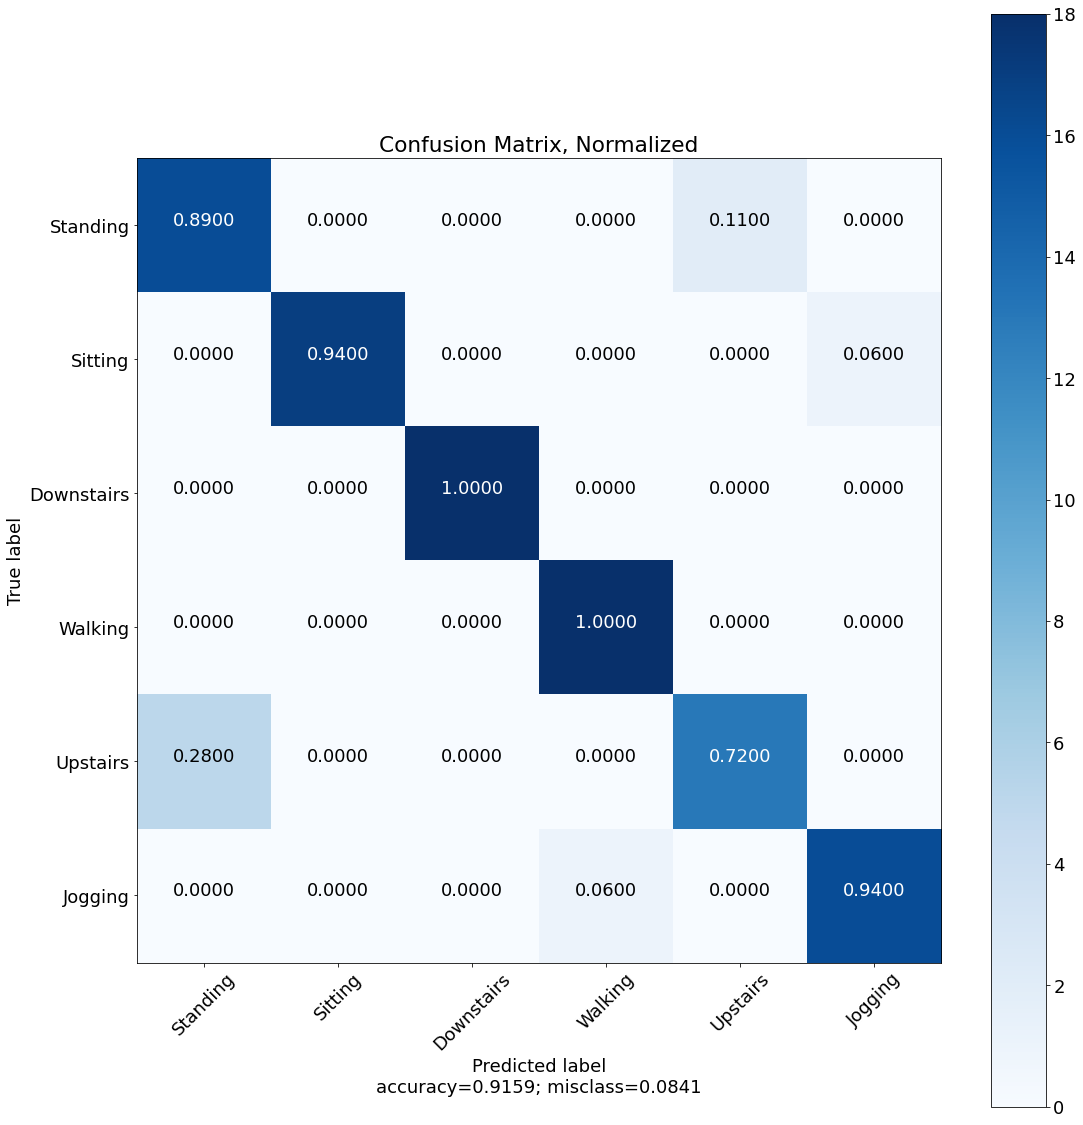

In [147]:
plot_confusion_matrix(cm           = mat, 
                      normalize    = True,
                      target_names = class_names,
                      title        = "Confusion Matrix, Normalized")

In [ ]:
gt = model.save_weights('model.h5')

In [ ]:
gt